# **Global Temperature Anomaly Prediction & Analysis - Dashboard**


# Problem Statement

Context:

It is essential to predict global temperature anomalies based on historical data to identify current trends and patterns of cooling and warming, calculate future trends accurately, compare locations, and understand climate variability over large areas such as global warming

Objective:

As a Data Science Intern, you are tasked with developing an end-to-end machine learning pipeline that predicts global temperature anomalies based on historical data.  The
objective is to create a comprehensive tool that allows users to analyze global temperature anomalies, make
future predictions, and visually explore climate trends.

Deliverables:

The project will include building a predictive model using Machine Learning (ML), deploying it with Streamlit, and visualizing the results using Tableau/Power BI.

Data Description:

This dataset provides monthly temperature anomalies from 1880 to the present, with each row representing a different year. The temperature anomalies are compared to a long-term baseline (typically the 20th-century average) and are measured in degrees Celsius.

Data Dictionary:

Columns in the Dataset:
1. Year: The year of observation.
2. Month Columns (Jan-Dec): The temperature anomaly for each month (from January to December).
3. J-D: The annual mean temperature anomaly (based on all 12 months of the year).
4. D-N: The December to November temperature anomaly.
5. Seasonal Columns (DJF, MAM, JJA, SON):
o DJF: Winter temperature anomaly (December, January, February).
o MAM: Spring temperature anomaly (March, April, May).
o JJA: Summer temperature anomaly (June, July, August).
o SON: Fall temperature anomaly (September, October, November).

## Phase 1: Data Exploration and pre-processing:

1. Installing all necessary libraries

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Enabling plotting inline
%matplotlib inline

#To supress warnings
import warnings
warnings.filterwarnings('ignore')

2. Data loading

In [3]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Global_Temp-edited.csv')

In [4]:
# making a copy of the dataset to preserve the original under data
data = df.copy()

In [5]:
#Setting the seed for reproducibility
np.random.seed(42)

3. Data Overview

In [6]:
#Inspecting the first five rows of the dataset
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.20,-0.26,-0.09,-0.17,-0.10,-0.22,-0.21,-0.11,-0.16,-0.23,-0.23,-0.19,-0.18,***,***,-0.12,-0.18,-0.21
1,1881,-0.20,-0.16,0.02,0.03,0.06,-0.19,0.00,-0.05,-0.16,-0.22,-0.19,-0.08,-0.10,-0.11,-0.18,0.04,-0.08,-0.19
2,1882,0.15,0.13,0.04,-0.17,-0.14,-0.23,-0.17,-0.08,-0.15,-0.24,-0.17,-0.37,-0.12,-0.09,0.07,-0.09,-0.16,-0.19
3,1883,-0.30,-0.37,-0.13,-0.19,-0.18,-0.08,-0.08,-0.15,-0.23,-0.12,-0.24,-0.12,-0.18,-0.2,-0.35,-0.17,-0.10,-0.20
4,1884,-0.13,-0.09,-0.37,-0.41,-0.34,-0.35,-0.31,-0.28,-0.28,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.32,-0.29


In [8]:
#Inspecting the last five rows of the dataset
df.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
140,2020,1.18,1.24,1.18,1.12,1.00,0.91,0.89,0.86,0.96,0.87,1.09,0.79,1.01,1.03,1.18,1.10,0.89,0.98
141,2021,0.81,0.64,0.89,0.76,0.79,0.84,0.92,0.81,0.92,0.98,0.92,0.87,0.85,0.84,0.75,0.81,0.86,0.94
142,2022,0.91,0.89,1.04,0.83,0.84,0.92,0.94,0.95,0.89,0.97,0.73,0.80,0.89,0.9,0.89,0.91,0.94,0.86
143,2023,0.88,0.97,1.23,0.99,0.94,1.08,1.19,1.19,1.48,1.34,1.42,1.35,1.17,1.13,0.88,1.05,1.16,1.41
144,2024,1.24,1.44,1.39,1.31,1.16,1.24,1.20,1.30,1.23,1.33,1.29,1.26,1.28,1.29,1.35,1.29,1.25,1.29


In [7]:
#Viewing the shape of the dataset
df.shape

(145, 19)

The global temp dataset had 145 rows and 19 columns

In [9]:
#Checking the data types of the columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     145 non-null    float64
 12  Dec     145 non-null    float64
 13  J-D     145 non-null    float64
 14  D-N     145 non-null    object 
 15  DJF     145 non-null    object 
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     145 non-null    float64
dtypes: float64(16), int64(1), object(2)
memory usage: 21.7+ KB


There are two columns - "D-N" and "DJF" that have null values entered as special characters that show up as "object: dtype. We'll attempt to impute or drop the null value rows in these two columns after analysis

4. Data Cleaning

In [10]:
# Function to check if a value is numerical
def is_numerical(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [12]:
# Read the CSV file and find rows with non-numerical values
non_numerical_rows = []
for i, row in df.iterrows():  # Start at 2 to account for header row
        for value in row:
            if not is_numerical(value):
                non_numerical_rows.append((i, row))
                break

In [13]:
# Print the rows with non-numerical values
print(f"Found {len(non_numerical_rows)} rows with non-numerical values:")
for row_index, row in non_numerical_rows:
    print(f"Row {row_index}: {row}")

Found 1 rows with non-numerical values:
Row 0: Year    1880
Jan     -0.2
Feb    -0.26
Mar    -0.09
Apr    -0.17
May     -0.1
Jun    -0.22
Jul    -0.21
Aug    -0.11
Sep    -0.16
Oct    -0.23
Nov    -0.23
Dec    -0.19
J-D    -0.18
D-N      ***
DJF      ***
MAM    -0.12
JJA    -0.18
SON    -0.21
Name: 0, dtype: object


There is only one row(Row 0) with missing values(1st row) in the dataset and we'll impute it with the value (average computed from available columns). This will take care of the dtype conversion

Row o missing values calculation:

Average anomaly for December to November period D-N: sum of 11 months/11 = -1.98

For DJF: Winter temperature anomaly (December, January, February): sum of Jan and Feb/2 = -0.46/2 = -0.23

In [14]:
# Fill the specific value in the specified column and specified row
df.at[0, 'D-N'] = -1.98
df.at[0, 'DJF'] = -0.23

In [15]:
#Checking to see if there is any missing values
df.isnull().sum()

,0
Year,0
Jan,0
Feb,0
Mar,0
Apr,0
May,0
Jun,0
Jul,0
Aug,0
Sep,0


In [16]:
#Checking to see if there is nay duplicated rows
df.duplicated().sum()

0

In [17]:
# Change the data type from object to float64 for the two columns "D-N", "DJF"
df['D-N'] = df['D-N'].astype('float64')
df['DJF'] = df['DJF'].astype('float64')

In [18]:
#Detecting extreme outliers using Z-score method
def remove_outliers(df, columns_to_check):
   for column in columns_to_check:
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[(z_scores > -3) & (z_scores < 3)]



In [19]:
#creating a list of columns for checking and removing extreme ouliers
columns_to_check = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM','JJA','SON']
df_ext_out_removed = remove_outliers(df, columns_to_check)

In [20]:
# Rechecking to see the info of the dataset(column,count,data type) after cleaning
df_ext_out_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     145 non-null    float64
 12  Dec     145 non-null    float64
 13  J-D     145 non-null    float64
 14  D-N     145 non-null    float64
 15  DJF     145 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     145 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.7 KB


In [21]:
#Assigning this under variable df1 and using df1 further
df1 = df_ext_out_removed

There are no extreme outliers in the dataset(nothing above 3 standard deviations). Now all 145 rows have no missing values, no extreme outliers, and all are of appropriate dtype.

5. Five Year Rolling Average and DateTime Index

In [22]:
# Creating a new column for yearly moving average(5 year average) to see the long term trends
df1['MA_5'] = df1['J-D'].rolling(window=5).mean()


In [23]:
#Viewing the newly created column
print(df1.tail())

     Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
140  2020  1.18  1.24  1.18  1.12  1.00  0.91  0.89  0.86  0.96  0.87  1.09   
141  2021  0.81  0.64  0.89  0.76  0.79  0.84  0.92  0.81  0.92  0.98  0.92   
142  2022  0.91  0.89  1.04  0.83  0.84  0.92  0.94  0.95  0.89  0.97  0.73   
143  2023  0.88  0.97  1.23  0.99  0.94  1.08  1.19  1.19  1.48  1.34  1.42   
144  2024  1.24  1.44  1.39  1.31  1.16  1.24  1.20  1.30  1.23  1.33  1.29   

      Dec   J-D   D-N   DJF   MAM   JJA   SON   MA_5  
140  0.79  1.01  1.03  1.18  1.10  0.89  0.98  0.954  
141  0.87  0.85  0.84  0.75  0.81  0.86  0.94  0.922  
142  0.80  0.89  0.90  0.89  0.91  0.94  0.86  0.916  
143  1.35  1.17  1.13  0.88  1.05  1.16  1.41  0.980  
144  1.26  1.28  1.29  1.35  1.29  1.25  1.29  1.040  


In [24]:
# Converting the year column to datetime format to create a new column ( to extract useful features such as the year,
#decade, or even the time elapsed since a reference point)
df1['Year_dt'] = pd.to_datetime(df1['Year'], format='%Y')

In [25]:
#setting thw datetime column as sindex
df1= df1.set_index('Year_dt')

In [26]:
#Viewing the new datetime year column to see the changes
print(df1.tail())

            Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  \
Year_dt                                                                        
2020-01-01  2020  1.18  1.24  1.18  1.12  1.00  0.91  0.89  0.86  0.96  0.87   
2021-01-01  2021  0.81  0.64  0.89  0.76  0.79  0.84  0.92  0.81  0.92  0.98   
2022-01-01  2022  0.91  0.89  1.04  0.83  0.84  0.92  0.94  0.95  0.89  0.97   
2023-01-01  2023  0.88  0.97  1.23  0.99  0.94  1.08  1.19  1.19  1.48  1.34   
2024-01-01  2024  1.24  1.44  1.39  1.31  1.16  1.24  1.20  1.30  1.23  1.33   

             Nov   Dec   J-D   D-N   DJF   MAM   JJA   SON   MA_5  
Year_dt                                                            
2020-01-01  1.09  0.79  1.01  1.03  1.18  1.10  0.89  0.98  0.954  
2021-01-01  0.92  0.87  0.85  0.84  0.75  0.81  0.86  0.94  0.922  
2022-01-01  0.73  0.80  0.89  0.90  0.89  0.91  0.94  0.86  0.916  
2023-01-01  1.42  1.35  1.17  1.13  0.88  1.05  1.16  1.41  0.980  
2024-01-01  1.29  1.26  1.28  1

Time based features such as year, month, and season are already extracted.
For now, lets leave the year column as it is. We can encode or scale the year values as needed while modelling

# Phase 2: Exploratory Data Analysis

# Descriptive Statistics

In [27]:
#Viewing the statistical summary of the data
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,145.0,1952.000000,42.001984,1880.000,1916.00,1952.000,1988.000,2024.00
Jan,145.0,0.068690,0.434603,-0.810,-0.25,-0.010,0.320,1.24
Feb,145.0,0.077172,0.441759,-0.630,-0.24,-0.040,0.390,1.44
Mar,145.0,0.094828,0.446745,-0.630,-0.23,0.010,0.320,1.39
Apr,145.0,0.068690,0.408954,-0.600,-0.25,-0.030,0.290,1.31
May,145.0,0.057862,0.389138,-0.550,-0.24,-0.040,0.280,1.16
Jun,145.0,0.045724,0.388585,-0.520,-0.25,-0.050,0.250,1.24
Jul,145.0,0.070276,0.370742,-0.510,-0.19,-0.030,0.260,1.20
Aug,145.0,0.068552,0.387203,-0.540,-0.22,-0.050,0.260,1.30
Sep,145.0,0.073793,0.388568,-0.580,-0.20,-0.050,0.250,1.48


# Visualizing trends

1. Visualizing Annual Temperature Anamoly Trends

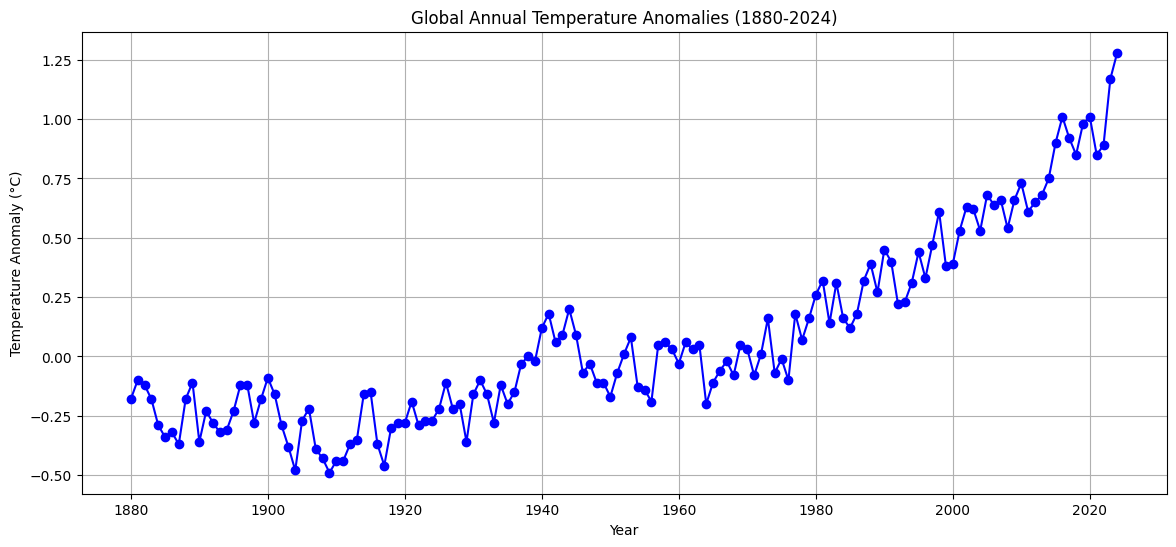

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df1['Year'], df1['J-D'],marker='o', linestyle='-', color='blue')
plt.title('Global Annual Temperature Anomalies (1880-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

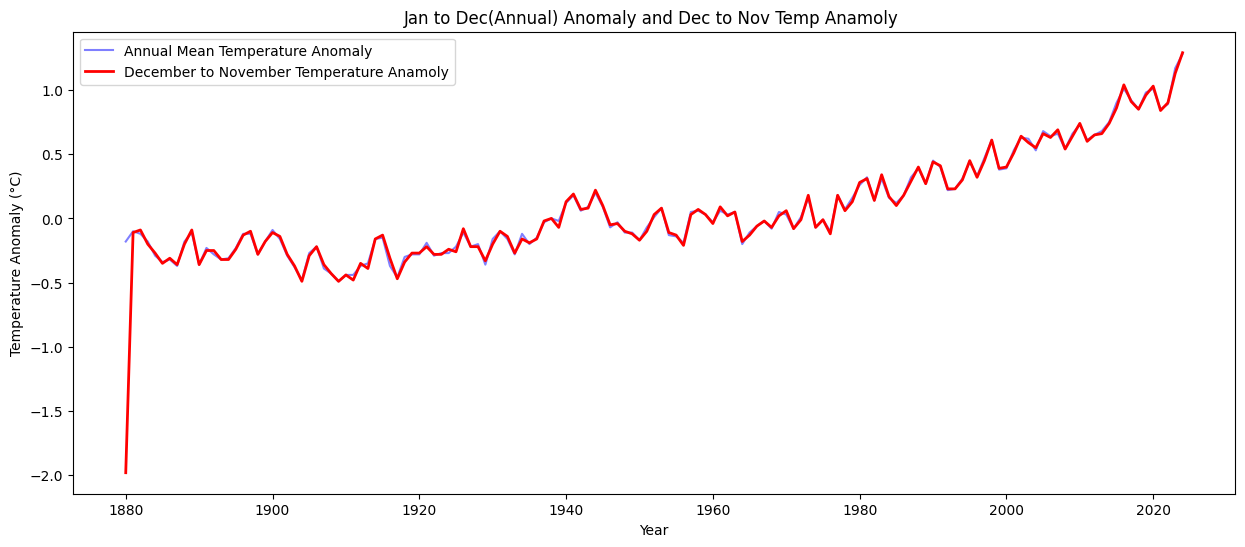

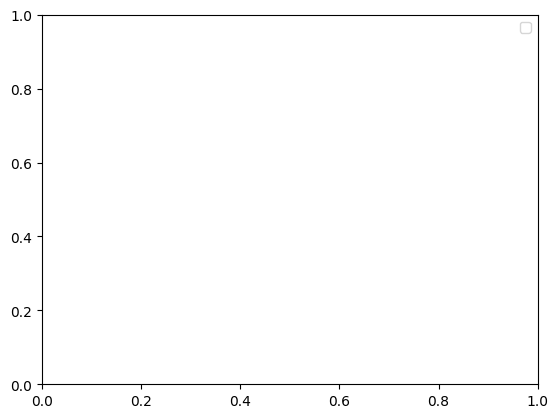

In [ ]:
# Plot the Annual mean temperature anomalies and the December to November temp anomalies together to view the difference in trend
plt.figure(figsize=(15, 6))
plt.plot(df1['Year'], df1['J-D'], label='Annual Mean Temperature Anomaly', color='blue', alpha=0.5)
plt.plot(df1['Year'], df1['D-N'], label='December to November Temperature Anamoly', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Jan to Dec(Annual) Anomaly and Dec to Nov Temp Anamoly ')

# Add a legend
plt.legend()

# Show the plot
plt.show()
plt.legend()



2. Trend Analysis with rolling mean (5 years)

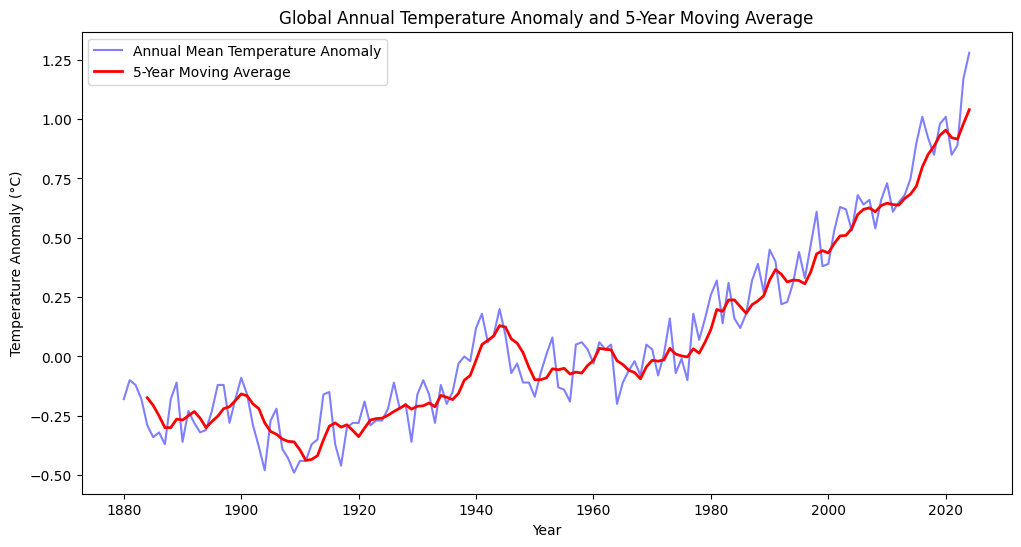

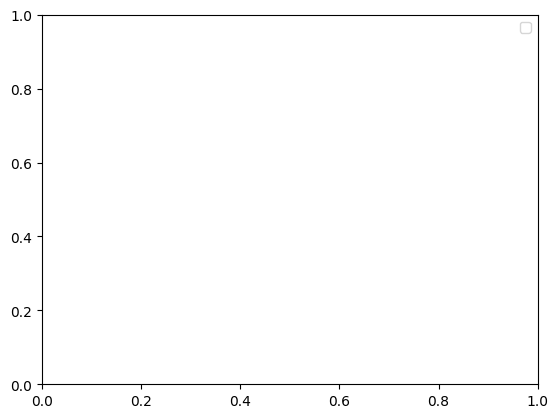

In [ ]:
# Plot the temperature anomalies and the 5 year moving average
plt.figure(figsize=(12, 6))
plt.plot(df1['Year'], df1['J-D'], label='Annual Mean Temperature Anomaly', color='blue', alpha=0.5)
plt.plot(df1['Year'], df1['MA_5'], label='5-Year Moving Average', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Global Annual Temperature Anomaly and 5-Year Moving Average')

# Add a legend
plt.legend()

# Show the plot
plt.show()
plt.legend()

# Show the plot
plt.show()

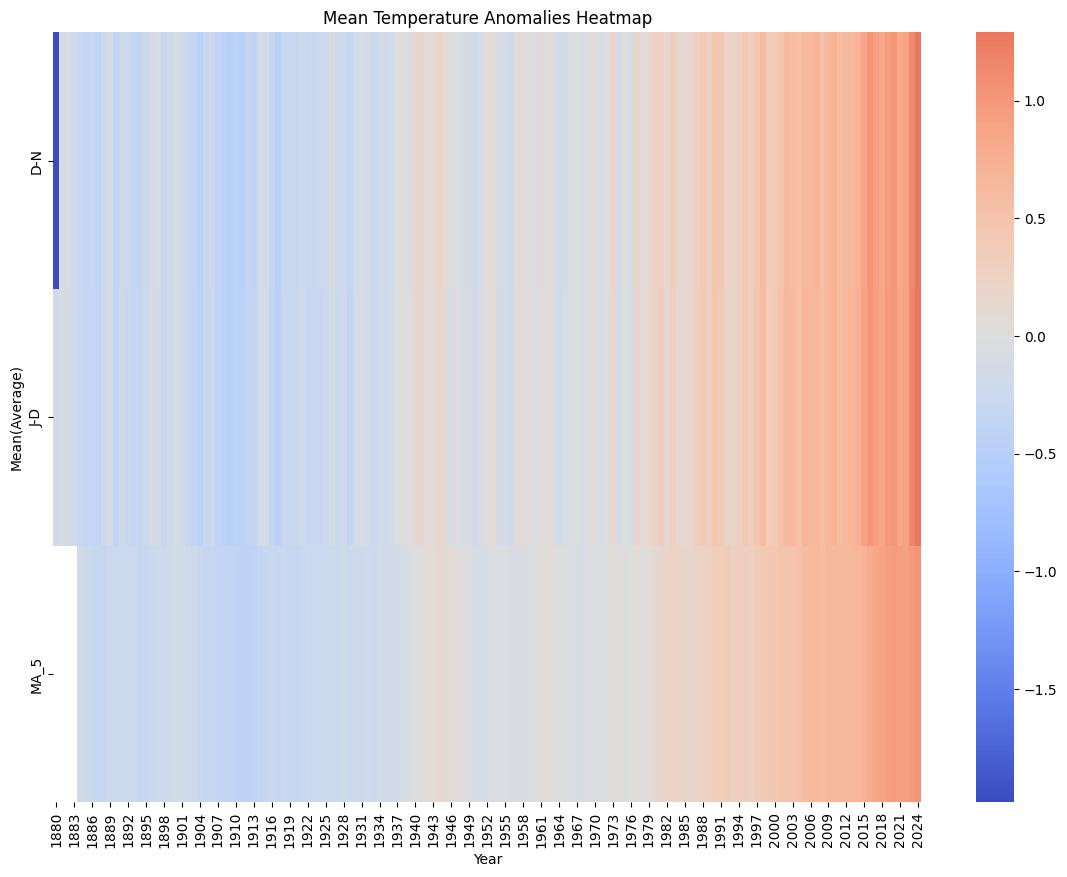

In [ ]:
#Mean(Average of 12 months) temperature anamoly Heatmap
means = ['J-D', 'D-N', 'MA_5']

means_data = df1.pivot_table(index='Year', values=means)

plt.figure(figsize=(14,10))
sns.heatmap(means_data.T, cmap='coolwarm', center=0)
plt.title('Mean Temperature Anomalies Heatmap')
plt.xlabel('Year')
plt.ylabel('Mean(Average)')
plt.show()

3. Trends - Seasonal Temperature Anamolies

In [ ]:
#Creating line plots to compare temperature anomalies for different months and seasons

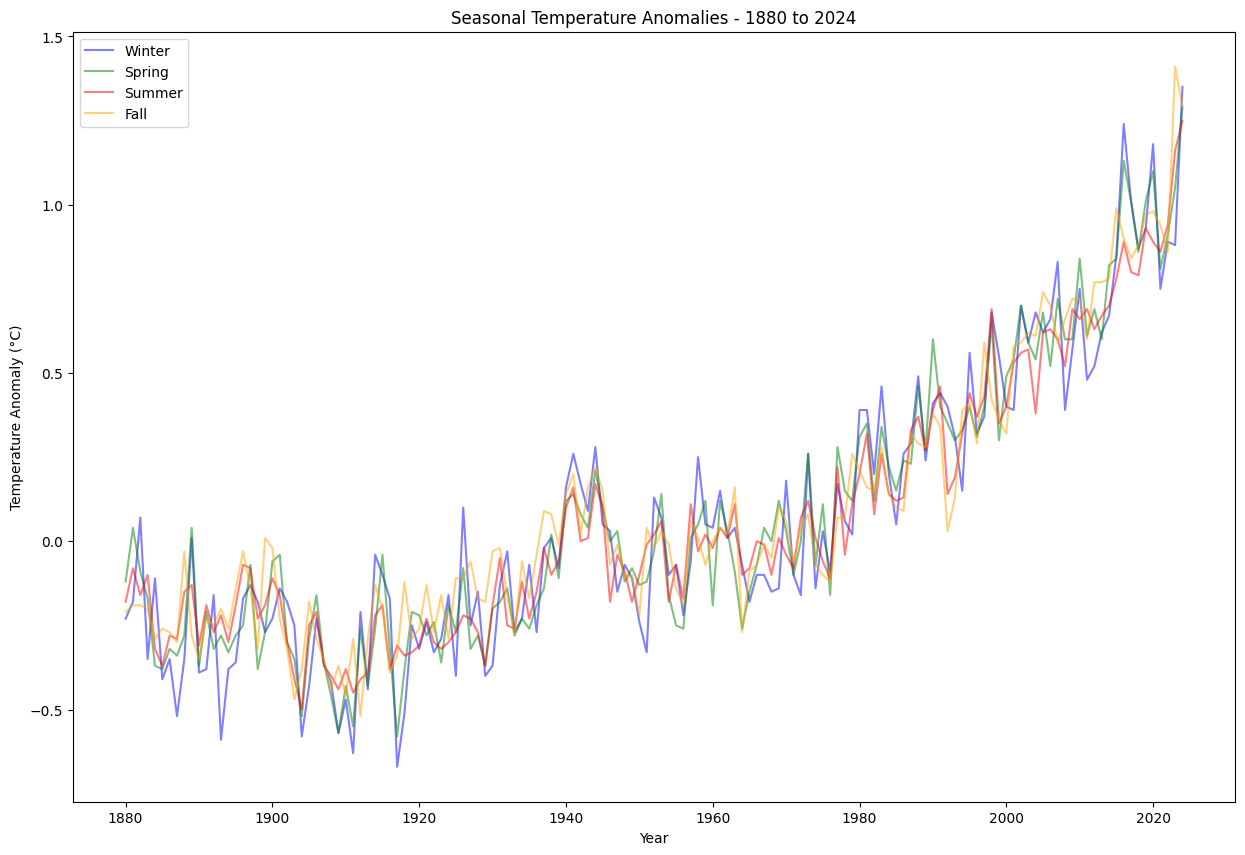

In [ ]:
# Plotting seasonal trends
plt.figure(figsize=(15, 10))

# Plot each season's temperature anomalies
plt.plot(df1['Year'], df1['DJF'], label='Winter', color='blue', alpha=0.5)
plt.plot(df1['Year'], df1['MAM'], label='Spring', color='green', alpha=0.5)
plt.plot(df1['Year'], df1['JJA'], label='Summer', color='red', alpha=0.5)
plt.plot(df1['Year'], df1['SON'], label='Fall', color='orange', alpha=0.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Seasonal Temperature Anomalies - 1880 to 2024')
plt.legend()

# Show the plot

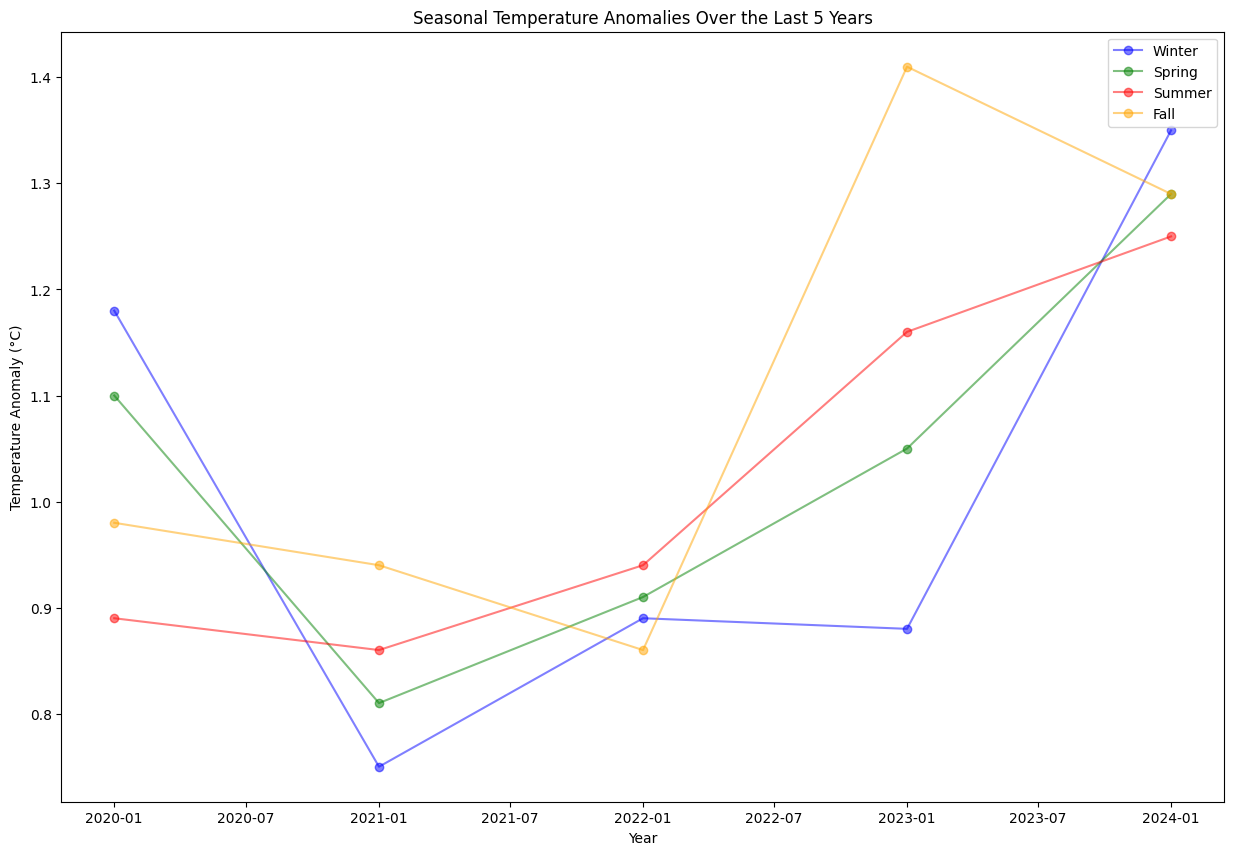

In [ ]:
# Filter the DataFrame for the last 5 years for viewing seasonal trends for the last section of data
last_5_years = df1.index.year.max() - 4
filtered_df_5 = df1[df1.index.year >= last_5_years]

# Plotting seasonal trends for the last 5 years
plt.figure(figsize=(15, 10))

# Plot each season's temperature anomalies
plt.plot(filtered_df_5.index, filtered_df_5['DJF'], label='Winter', color='blue',marker='o', linestyle='-', alpha=0.5)
plt.plot(filtered_df_5.index, filtered_df_5['MAM'], label='Spring', color='green', marker='o', linestyle='-',alpha=0.5)
plt.plot(filtered_df_5.index, filtered_df_5['JJA'], label='Summer', color='red', marker='o', linestyle='-',alpha=0.5)
plt.plot(filtered_df_5.index, filtered_df_5['SON'], label='Fall', color='orange', marker='o', linestyle='-',alpha=0.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Seasonal Temperature Anomalies Over the Last 5 Years')
plt.legend()

# Show the plot
plt.show()

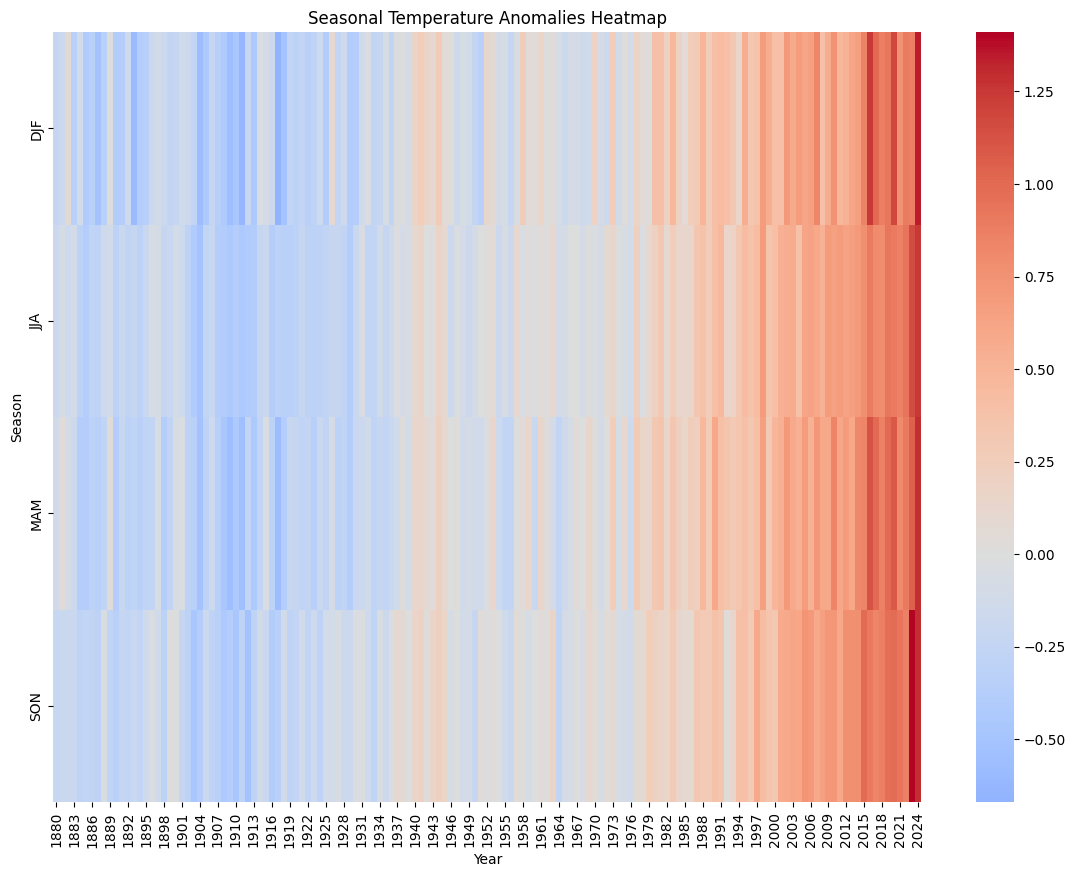

In [ ]:
#Seasonal temperature anamoly Heatmap
seasons = ['DJF', 'MAM', 'JJA', 'SON']

seasonal_data = df1.pivot_table(index='Year', values=seasons)

plt.figure(figsize=(14,10))
sns.heatmap(seasonal_data.T, cmap='coolwarm', center=0)
plt.title('Seasonal Temperature Anomalies Heatmap')
plt.xlabel('Year')
plt.ylabel('Season')
plt.show()

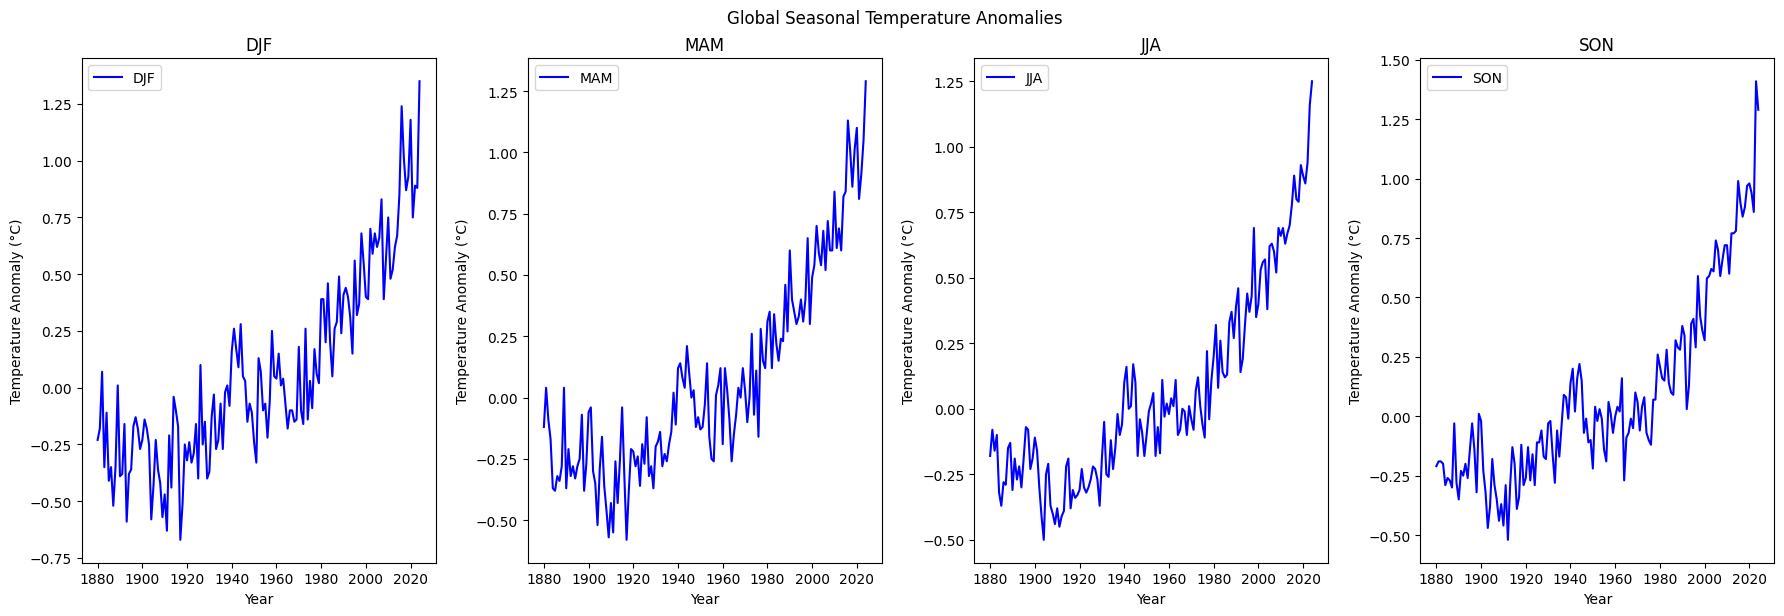

In [ ]:
#Viewing each season in a separate subplot

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(18, 6))

# Plot each month's temperature anomalies in a separate subplot
for i, season in enumerate(seasons):
    ax = axs[i]
    ax.plot(df['Year'], df[season], label=season, color='blue')
    ax.set_title(season)
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature Anomaly (°C)')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.suptitle('Global Seasonal Temperature Anomalies', y=1.02)

# Show the plot
plt.show()

4. Trends - Monthly Temperature Anamolies

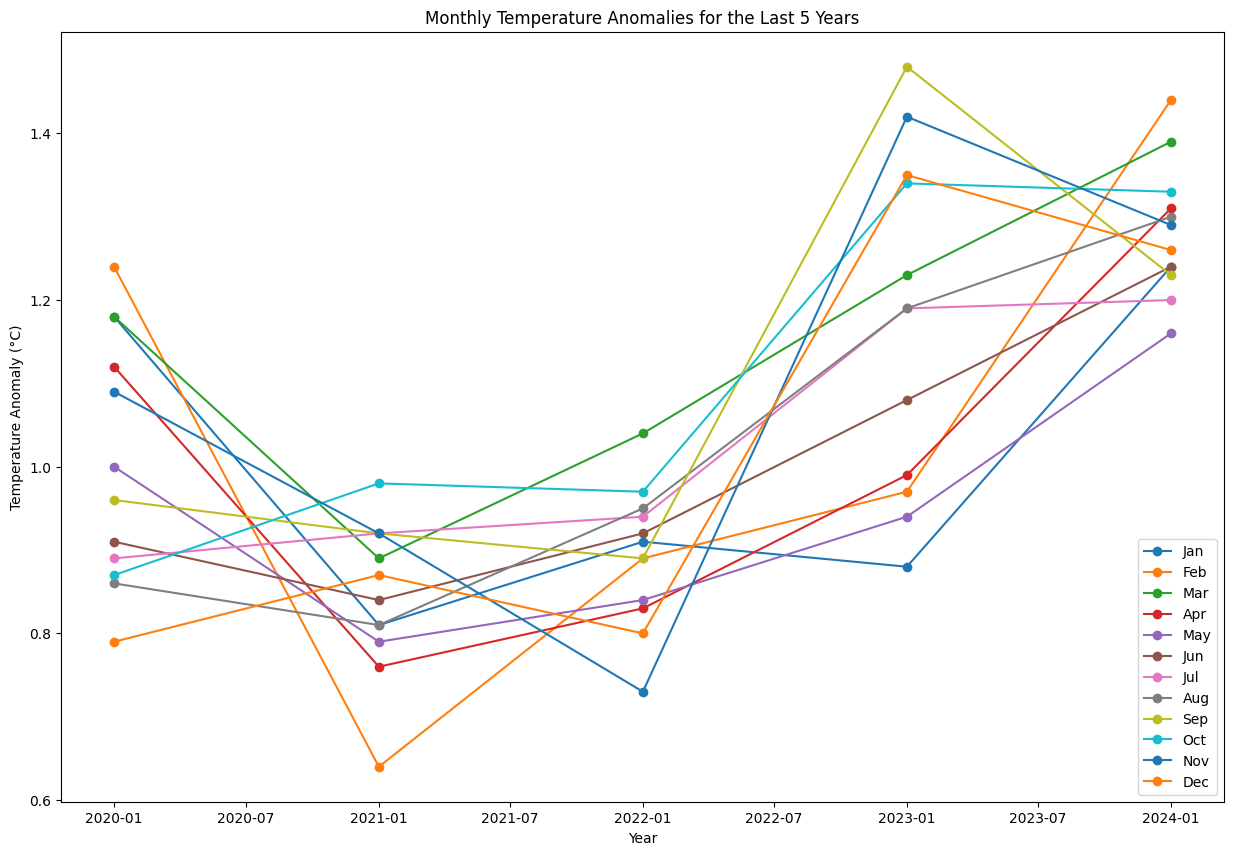

In [ ]:
# Define the months and their labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting monthly trends for the last 5 years
plt.figure(figsize=(15, 10))

for month in months:
    plt.plot(filtered_df_5.index, filtered_df_5[month], marker='o', linestyle='-',label=month)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Monthly Temperature Anomalies for the Last 5 Years')
plt.legend()

# Show the plot
plt.show()

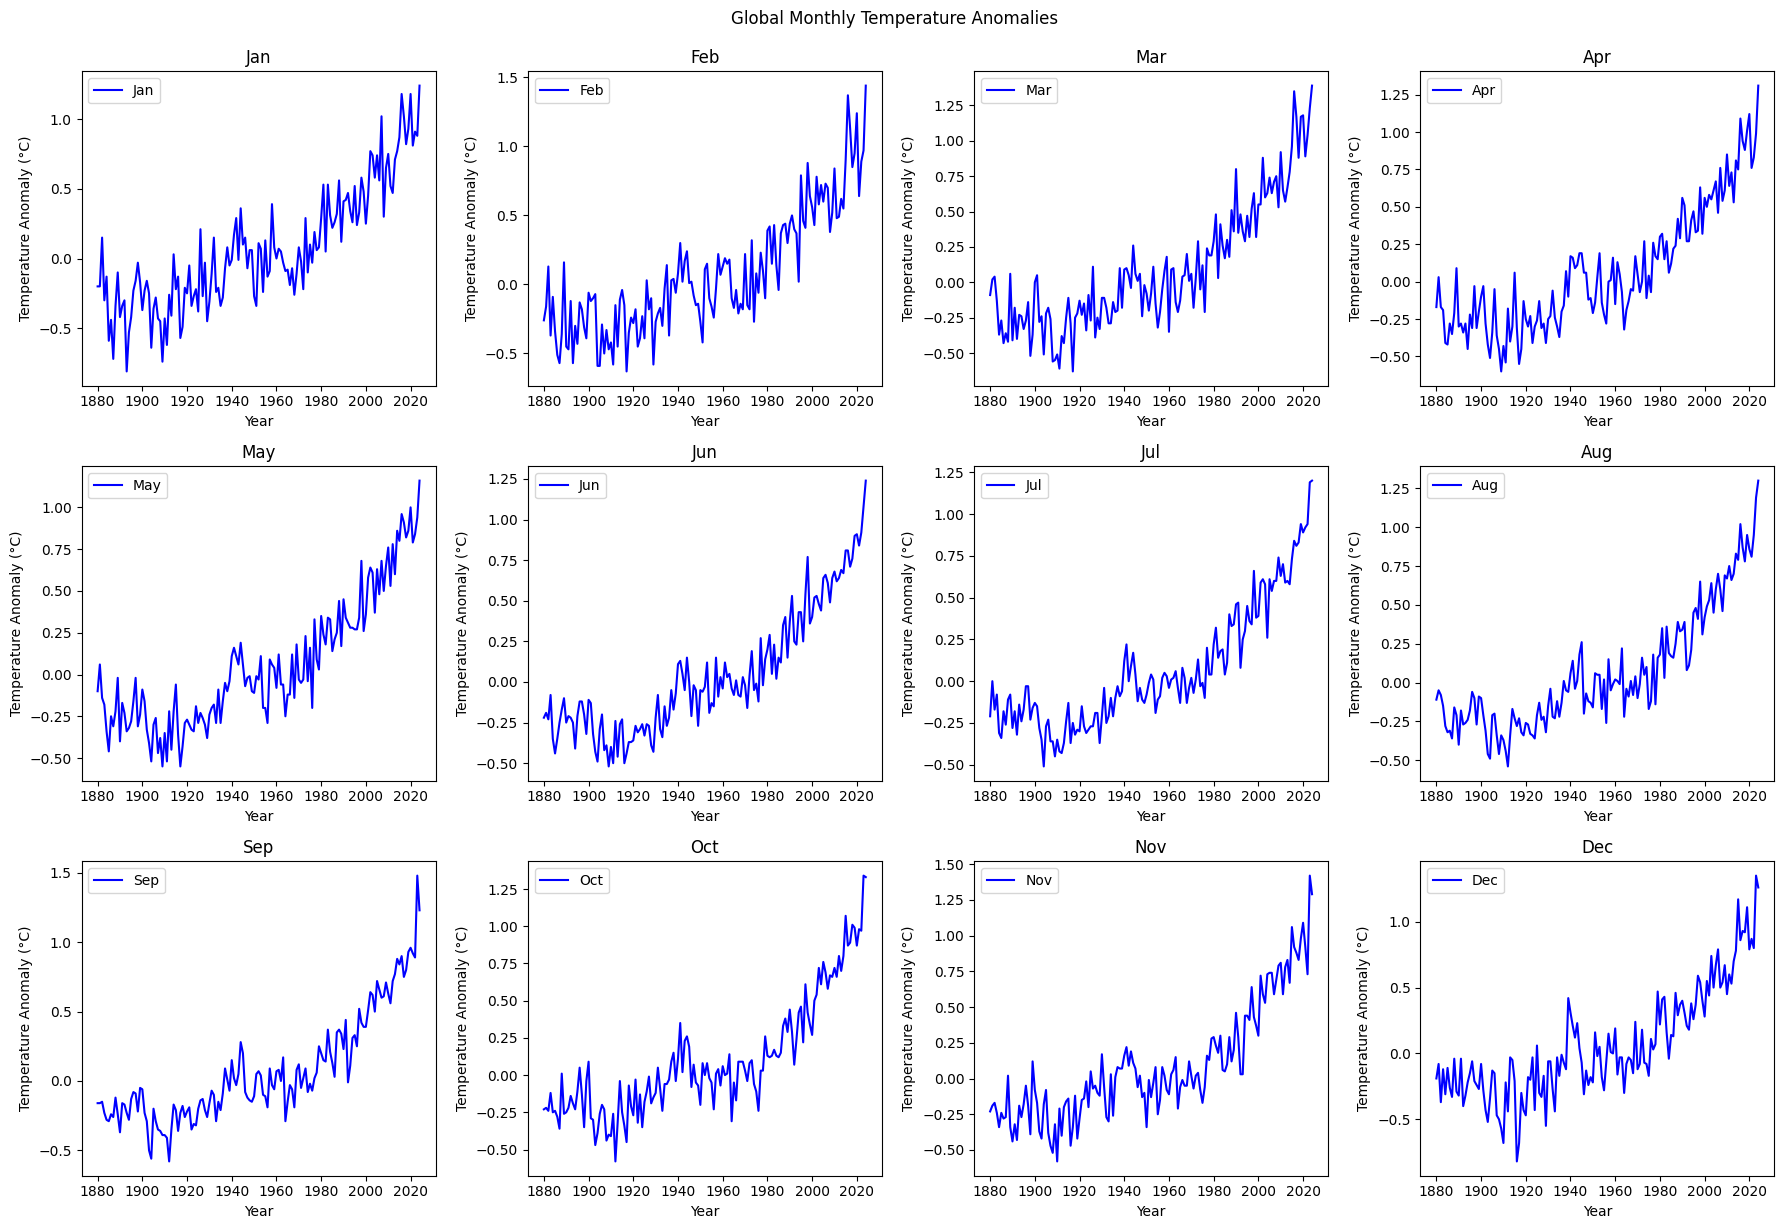

In [ ]:
#Viewing each month in a separate subplot
# Define the months and their labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Plot each month's temperature anomalies in a separate subplot
for i, month in enumerate(months):
    ax = axs[i // 4, i % 4]
    ax.plot(df['Year'], df[month], label=month, color='blue')
    ax.set_title(month)
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature Anomaly (°C)')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.suptitle('Global Monthly Temperature Anomalies', y=1.02)

# Show the plot
plt.show()

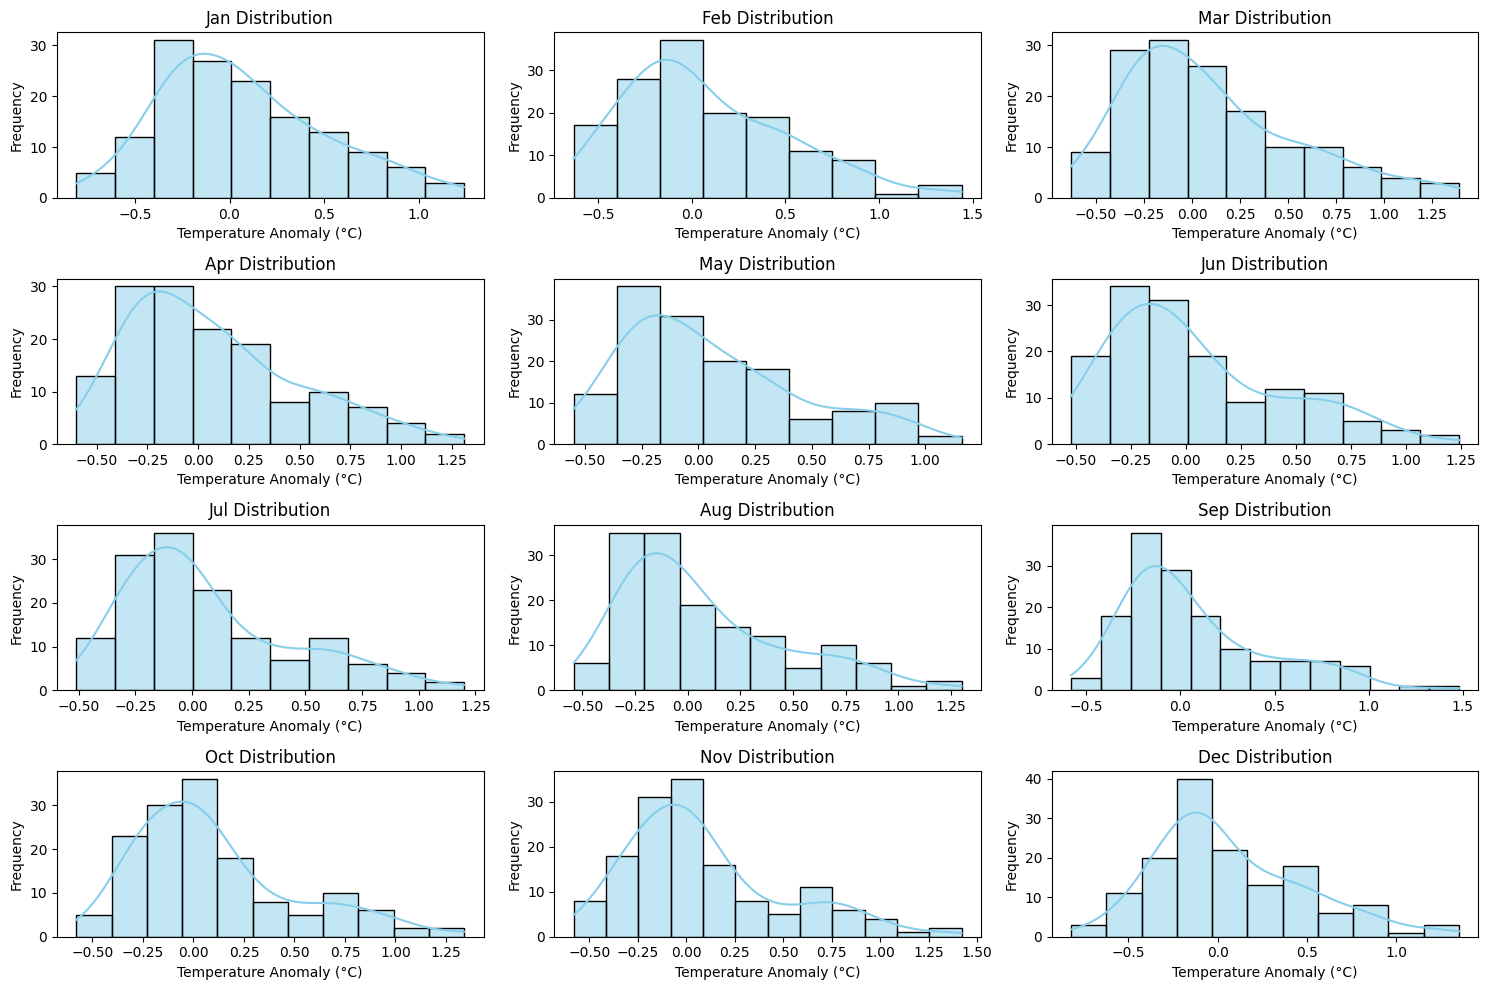

In [ ]:
# Set up the subplots for histogram of each month
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Plot the distribution for each month
for i, month in enumerate(months):
    sns.histplot(df[month], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{month} Distribution')
    axes[i].set_xlabel('Temperature Anomaly (°C)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

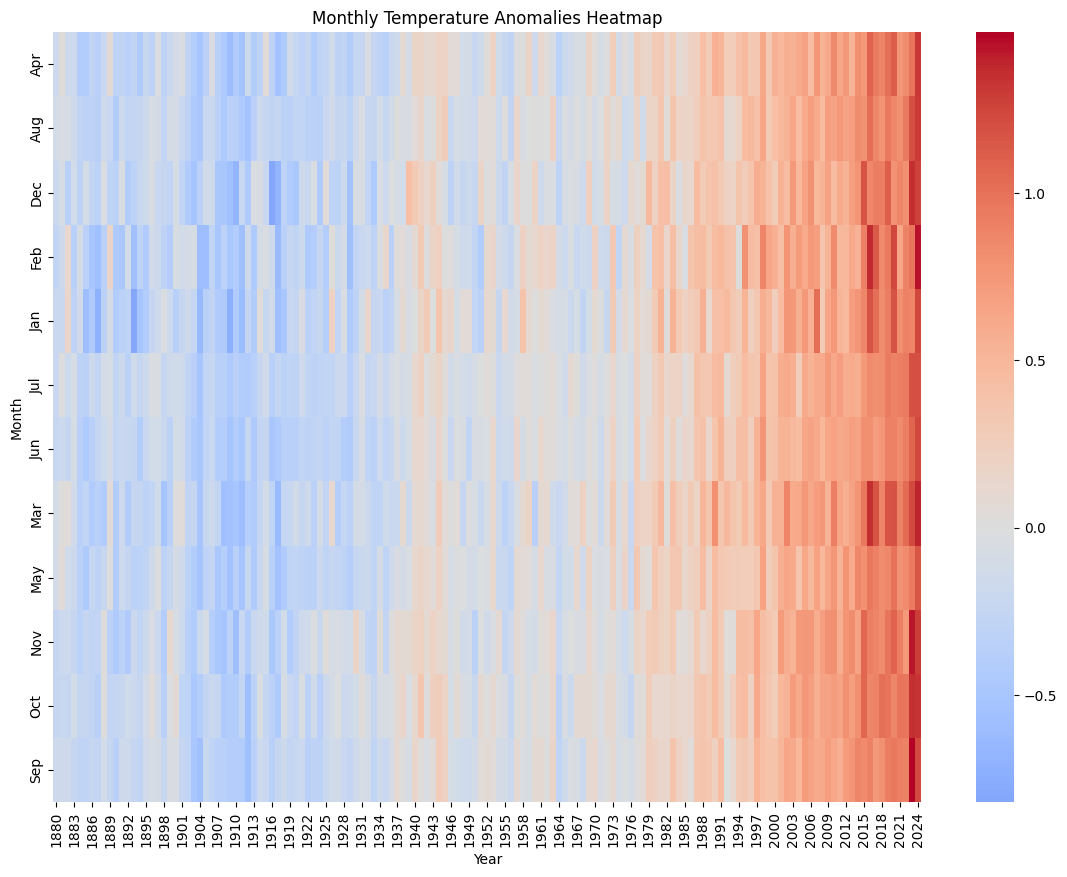

In [ ]:
#Monthly Temperature Anamoly Heatmap
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_data = df1.pivot_table(index='Year', values=months)

plt.figure(figsize=(14,10))
sns.heatmap(monthly_data.T, cmap='coolwarm', center=0)
plt.title('Monthly Temperature Anomalies Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

5. Distribution Analysis -Univariate

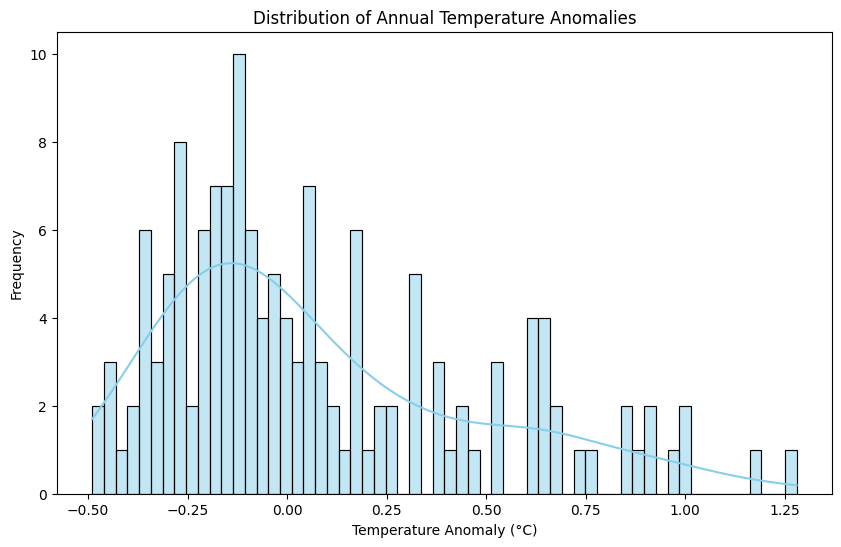

In [ ]:
#Histogram of Annual anamolies
plt.figure(figsize=(10,6))
sns.histplot(df1['J-D'], bins=60, kde=True, color='skyblue')
plt.title('Distribution of Annual Temperature Anomalies')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Frequency')
plt.show()

6. Bivariate Analysis

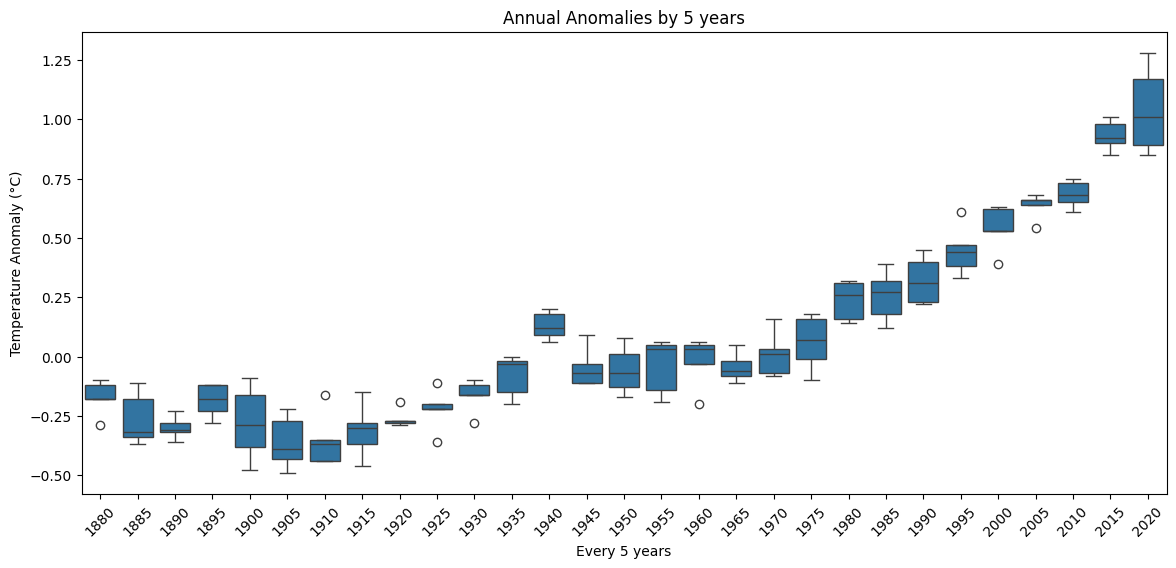

In [ ]:
#Boxplot by 5 years
df1['5_years'] = (df1['Year'] // 5) * 5

plt.figure(figsize=(14,6))
sns.boxplot(x='5_years', y='J-D', data=df1)
plt.title('Annual Anomalies by 5 years')
plt.xlabel('Every 5 years')
plt.ylabel('Temperature Anomaly (°C)')
plt.xticks(rotation=45)
plt.show()

7. Multivariate -Heatmap - Correlation Matrix - between Months and Seasons

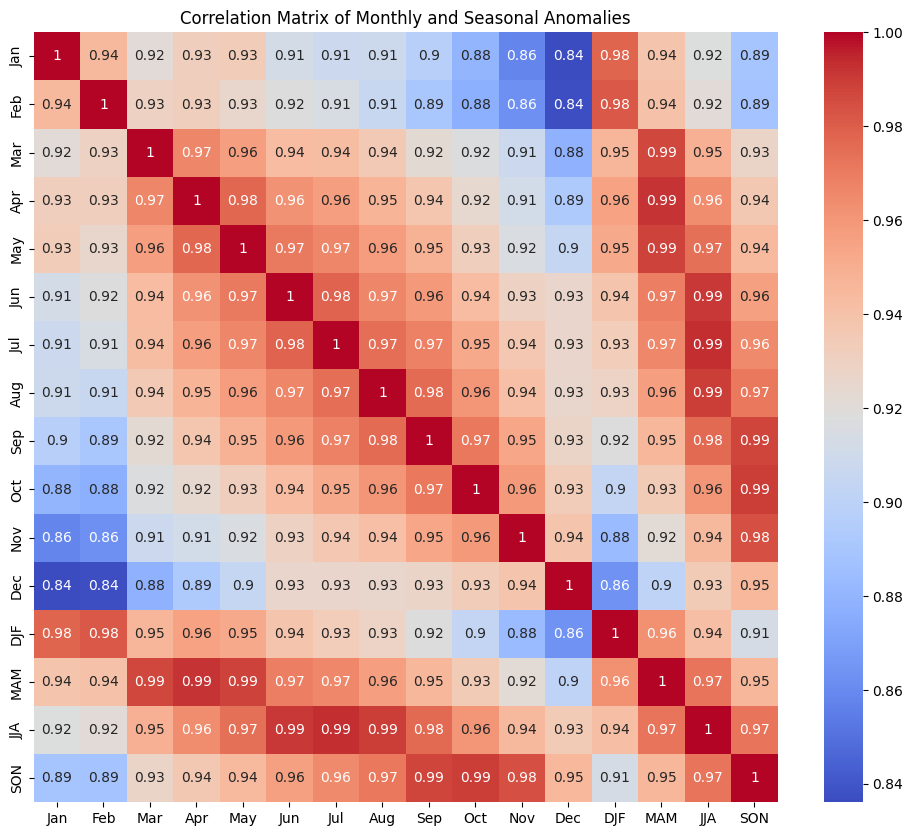

In [ ]:
plt.figure(figsize=(12,10))
corr_matrix = df1[months + seasons].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Monthly and Seasonal Anomalies')
plt.show()

8. Decomposing Time Series - to breakdown into trend, seasonlaity and residual components

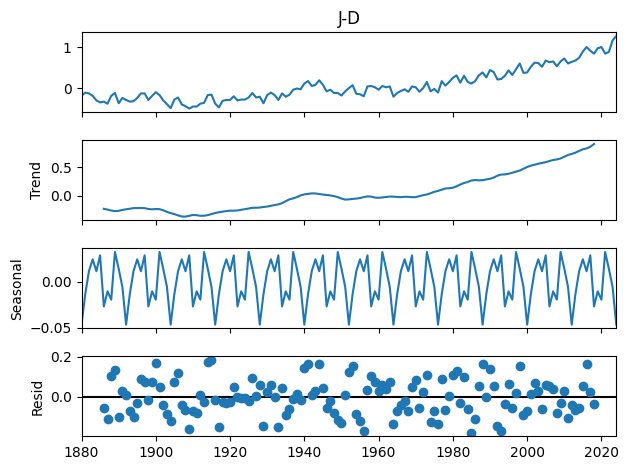

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(df1['J-D'], model='additive', period=12)
decomposition.plot()
plt.show()


# Insights from EDA

o Identify key trends such as the overall warming of the planet.

o Determine if certain months or seasons have experienced more pronounced
warming or cooling.

o Look for any patterns in the temperature anomaly distribution (e.g., outliers,
spikes, or dips).

o Univariate Analysis: Ploting the distribution of temperature anomalies to understand how anomalies have evolved over the years.

o Multivariate Analysis: Use a correlation heatmap to explore relationships between different months and seasonal temperature anomalies.

**Data Insights:**

This is a time series data with information on global temperature anomalies collected monthly from 1880 tom 2024 by comparing with long term baseline, 20th century average, measured in degree celsius.

**EDA - Objective:**

To identify the trends and patterns of cooling and warming in the provided data---> to predict the future trends of global temperature, overall warming of the planet

**Data Overview Observations:**

o Regularly spaced data, collected monthly over a span of 145 years

o No missing values in the monthly data collected, but the mean temp for the first year of the data (1880) has missing values for the columns D-J and DJF, since we dont have the data for the month of Decemeber 1879. We imputed with the average value of the available months for that time period

o No duplicate rows in the dataset

o There are 145 rows(one for each year) and 19 columns, all are numerical columns with data type of float64. The two columns that were incorrectly classified as "odject" dtype becuase of missing values were converted to float64

o The year columns was coverted to "Datatime" dtype and was set up as index for time series forecasting

o No extreme outliers were detected using Z-score method ( between -3 and 3)

o A column added for five year rolling average for EDA


**Descriptive Statistics Observatons:**

o The spread (standard deviation) for winter months and early Spring(when temps are still low) are higher when compared to other months of the year.
       Jan (0.43), Feb (0.44), Mar (0.446), Dec ( 0.41)

o Distribution: All months except January are positively skewed, have most of their data concentrated on the left ( between -0.5 to 0.25) and a tail on the right. The month of January has near normal distribution with most of the data concentrated in the center of the curve, still skewed positively

o Mean and Median are apart for all months, not normally distributed; Mode is either 0.0 or -0.25 for most months

**Time Series Key Concepts Observations: Trends, Seasonality, Cyclic,Stationarity, Noise**

*Seasonality:*

o Clear additive seasonality with increasing trend (in the latter years)

o Annual seasonal pattern - over a course of year (12 month period); constant, fixed, same magnitude

o Each seasonal cycle - starts with a bimodal spike, followed by a bimodal dip, then a sharp spike, followed by a sharp dip

*Stationarity: *

o We'll be using ML models - will create lagging features, rolling statistics to address temporal dependencies, and do normalization/scaling, handle trends and seasonlaity

**Data Visulaization Observations:**

*Annual (Mean) Temperature Anamoly:*
     
o Line Plot: Short peak between 1940-1945; Consistent linear increasing trend from 1970s to all the way up until 2024

o Jan to Dec(J-D) & Dec to Nov(D-N) lineplots are very similar and closely aligned, have similar trend and highly correlated

o Lineplot for 5 year Moving Averages - smoothens out peaks and valleys, has similar trend that we observed with line plot from annual mean. Short peak between 1940-1945; Consistent linear increasing trend from 1970s to all the way up until 2024

o Heatmap: 1. Consistent warm shades with increasing strength (Positive Correlation) as years progress from 1980 2. short warm shade (Strong positive correlation) during the short peak that we observed between 1940 to 1945 3. Cool shade (Strong negative correlation) before 1940

*Seasonal Temperature Anamoly:*

o Last 5 years line plot: For that particular year, all four seasons
        anamoly vlaues are in the same range, except 2023, where the values are spread out

o Line plot - Subplots for seasons over the entire span: follow similar
        trend and pattern that we observed for annual mean values

o Heatmap: shows similar correlation that we observed from annual data. Strongest correlation for 2023 fall and entire 2024


*Monthly Temperature Anamoly:*

o Similar to Seasonal Temparature anamoly observations

*Bivariate Analysis:*

o Boxplot: shows similar trend that we observed with line plot, with few outliers for some of the five periods (when the data is tightly distributed(small box with short whiskers). Last 5 years show wide distribution

*Multivariate Analysis:* Heatmap between all 12 months and 4 seasons show a strong positive correlation between them




# Feature Engineering to prepare the data for ML modelling

1. Auto-correlation Plot (Self - Correlation) - ACF and PACF plots

<Figure size 1400x600 with 0 Axes>

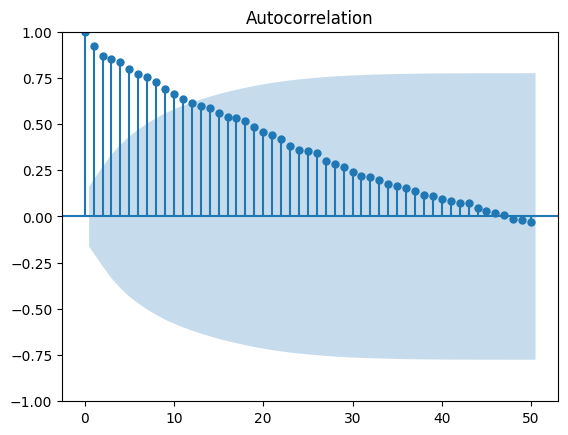

<Figure size 1400x600 with 0 Axes>

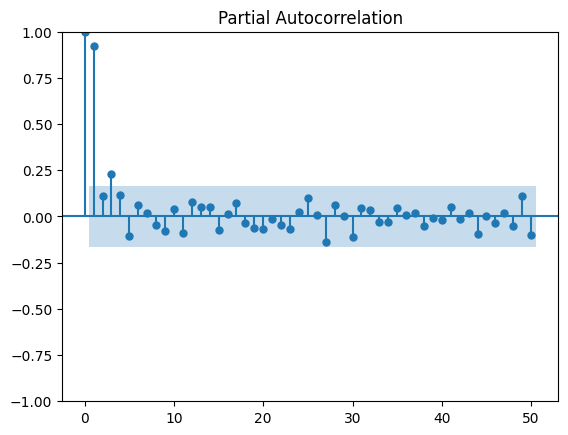

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14,6))
plot_acf(df1['J-D'], lags=50)
plt.show()

plt.figure(figsize=(14,6))
plot_pacf(df1['J-D'], lags=50)
plt.show()

**Observations from ACF and PACF plots:**

PACF plot: Lag 1 and Lag 2 have significant spikes outside the confidence interval - they are strong predictors of current value

ACF plot: Significant spikes at lags 1 through 4. As the lags get higher, the ACF number decreases and crosses zero at a certain point - suggesting this has a trend or seasonal component

**Conclusion:** Current temperature anamoly is highly influenced by anamolies from previous 1 to 4 years  ----> so creating lagged features of the target variable (annual mean anamoly for global warming) upto lag 4.



2. Creating lagged features of target variable upto lag 4 ("J-D" which is annual mean temp anamoly from Jan to Dec) and plotting lag scatter plot

In [30]:
# Ensure lagged features are created correctly without including future data
df1['Lag_1'] = df1['J-D'].shift(1)
df1['Lag_3'] = df1['J-D'].shift(3)


#Capturing rolling mean and standard deviation to capture trends abd volatility
# Ensure no future data leakage in rolling statistics
df1['RollingMean_3'] = df1['J-D'].rolling(window=3).mean().shift(1)
df1['RollingStd_3'] = df1['J-D'].rolling(window=3).std().shift(1)

# Drop rows with NaN values created by lagging
df_model = df1.dropna()

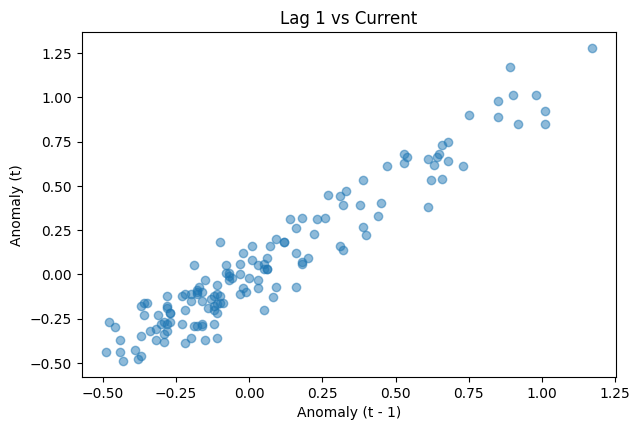

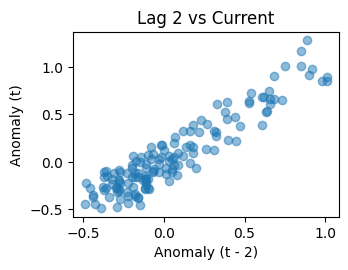

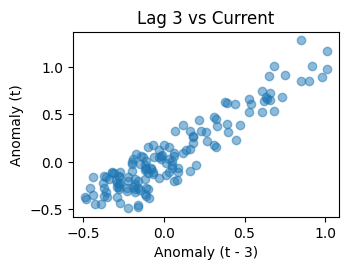

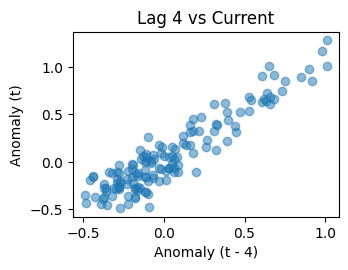

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Annual Anomaly' is your target variable
lags = [1, 2, 3, 4]  # Number of lags to consider
plt.figure(figsize=(12, 8))

for i, lag in enumerate(lags):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df1['J-D'].shift(lag), df1['J-D'], alpha=0.5)
    plt.title(f'Lag {lag} vs Current')
    plt.xlabel(f'Anomaly (t - {lag})')
    plt.ylabel('Anomaly (t)')
    plt.tight_layout()
    plt.show()


***Observations from lag scatter plot:*** including lagged variables that were created until lag4 as features will improve the model's performance

# Phase 3: Machine Learning Model Development

1**. Model Selection**

We'll be using the following three Machine Learning algorithms to predict the future temperature anamoly

    - Linear Regression - as a simple baseline model
    - Random Forest - to capture any non linear patterns
    - XGBoost

2. **Data Prep for modelling**

In [31]:
df_model.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON', 'MA_5',
       'Lag_1', 'Lag_3', 'RollingMean_3', 'RollingStd_3'],
      dtype='object')

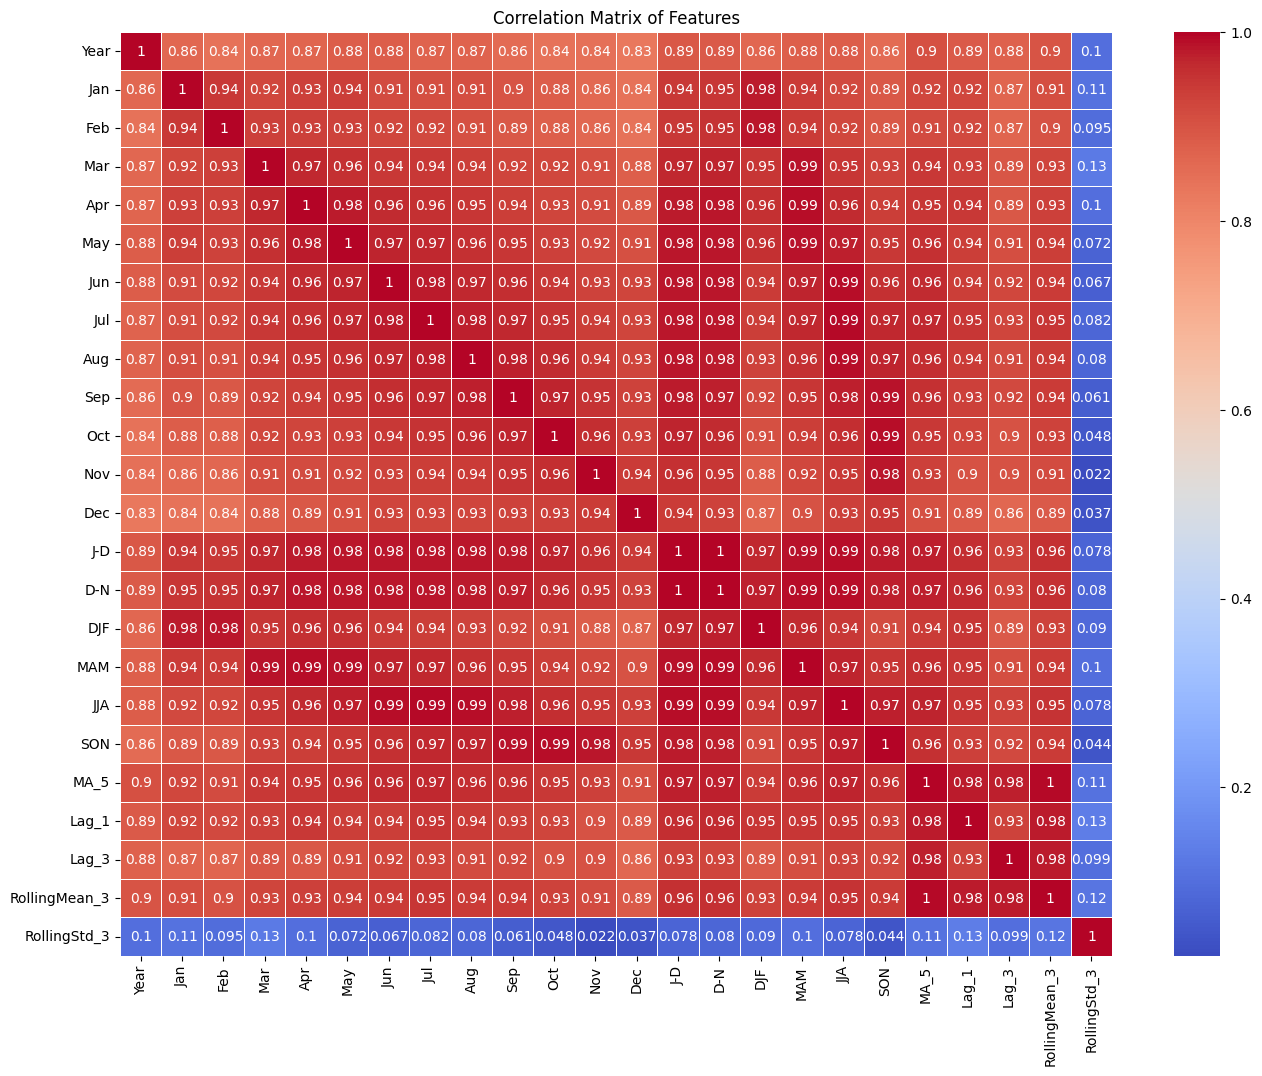

In [32]:
# Calculate correlation matrix
corr_matrix = df_model.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [33]:
#Importing necessary libraries for data prep and modelling

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
# Splitting into features and target
from sklearn.model_selection import train_test_split

target = 'J-D'
features = df_model.drop(columns=['D-N','Year', 'MA_5', 'DJF', 'MAM', 'JJA', 'SON', target])  # Drop the target column to create features
X = features.values
y = df_model[target].values

**Scaling features, Time Series split, Model Training and Evaluation**

In [36]:
#Train Test Split(Time series data)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Dictionaries to store metrics
mse_scores = {name: [] for name in models}
mae_scores = {name: [] for name in models}
r2_scores = {name: [] for name in models}

# Time series cross-validation
for fold, (train_index, test_index) in enumerate(tscv.split(X_scaled)):
    print(f"Fold {fold + 1}")
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Predict
        y_pred = model.predict(X_test)
        # Evaluate
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        # Store metrics
        mse_scores[name].append(mse)
        mae_scores[name].append(mae)
        r2_scores[name].append(r2)
        print(f"{name}: MSE={mse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")
    print("-" * 40)

# Calculate average metrics across folds
print("\nAverage Metrics Across Folds:")
for name in models:
    avg_mse = np.mean(mse_scores[name])
    avg_mae = np.mean(mae_scores[name])
    avg_r2 = np.mean(r2_scores[name])
    print(f"{name}: Avg. MSE={avg_mse:.4f}, Avg. MAE={avg_mae:.4f}, Avg. R²={avg_r2:.4f}")

Fold 1
Linear Regression: MSE=0.0000, MAE=0.0033, R²=0.9986
Random Forest: MSE=0.0034, MAE=0.0501, R²=0.6920
XGBoost: MSE=0.0050, MAE=0.0612, R²=0.5390
----------------------------------------
Fold 2
Linear Regression: MSE=0.0000, MAE=0.0034, R²=0.9989
Random Forest: MSE=0.0201, MAE=0.1086, R²=-0.3487
XGBoost: MSE=0.0233, MAE=0.1184, R²=-0.5646
----------------------------------------
Fold 3
Linear Regression: MSE=0.0000, MAE=0.0029, R²=0.9986
Random Forest: MSE=0.0004, MAE=0.0148, R²=0.9578
XGBoost: MSE=0.0010, MAE=0.0249, R²=0.8829
----------------------------------------
Fold 4
Linear Regression: MSE=0.0000, MAE=0.0025, R²=0.9995
Random Forest: MSE=0.0400, MAE=0.1672, R²=-1.4894
XGBoost: MSE=0.0335, MAE=0.1553, R²=-1.0879
----------------------------------------
Fold 5
Linear Regression: MSE=0.0000, MAE=0.0029, R²=0.9997
Random Forest: MSE=0.1004, MAE=0.2599, R²=-1.6063
XGBoost: MSE=0.0761, MAE=0.2187, R²=-0.9766
----------------------------------------

Average Metrics Across Folds

In [37]:
from sklearn.model_selection import TimeSeriesSplit

# Time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []
mae_scores = []
r2_scores = []

# Time series cross-validation loop
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

    print(f"MSE: {mse_scores[-1]}, MAE: {mae_scores[-1]}, R²: {r2_scores[-1]}")

print(f"Average MSE: {np.mean(mse_scores)}, Average MAE: {np.mean(mae_scores)}, Average R²: {np.mean(r2_scores)}")

MSE: 1.5594419144138214e-05, MAE: 0.0033296159879639075, R²: 0.998572414126735
MSE: 1.6769781048582064e-05, MAE: 0.0034016954732179667, R²: 0.9988727809180813
MSE: 1.2231872990917954e-05, MAE: 0.002899746442808771, R²: 0.9985936403364061
MSE: 8.132848438256183e-06, MAE: 0.0024616658125873833, R²: 0.9994937068320658
MSE: 1.023328022538116e-05, MAE: 0.002866108391242003, R²: 0.9997342566202984
Average MSE: 1.2592440369455115e-05, Average MAE: 0.0029917664215640062, Average R²: 0.9990533597667174


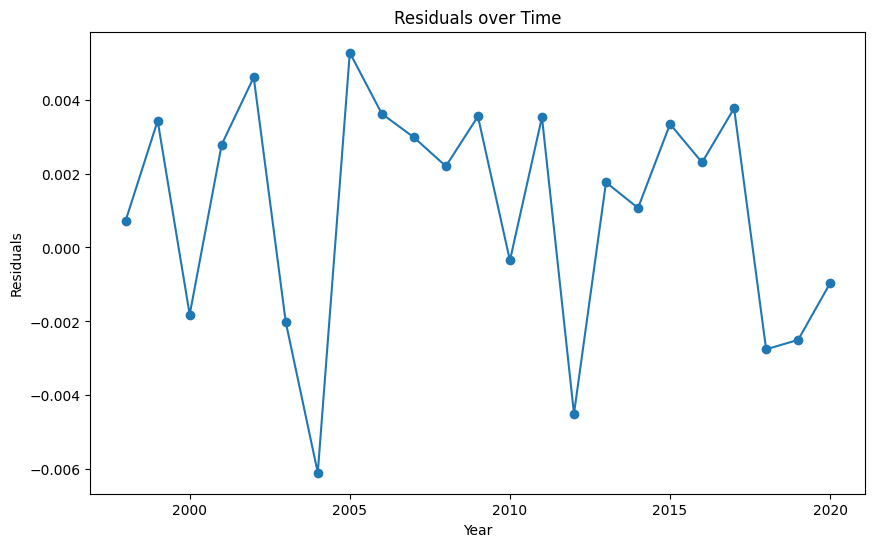

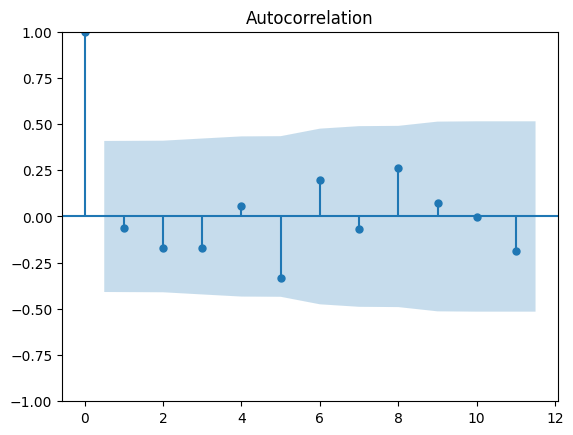

In [38]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.plot(df['Year'].iloc[test_index], residuals, marker='o')
plt.title('Residuals over Time')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

plot_acf(residuals)
plt.show()